In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


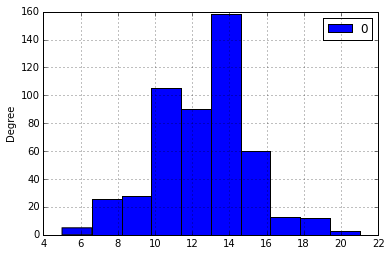

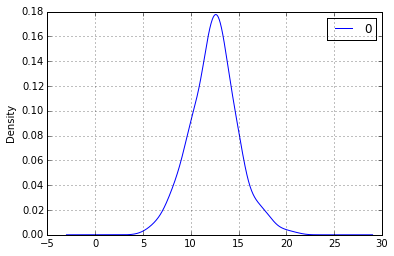

In [4]:
import pandas as pd
from scipy import stats

rv = stats.binom(25, 0.5)
s = rv.rvs(500)

df = pd.DataFrame(s)

df.plot(kind='hist')
df.plot(kind='kde')

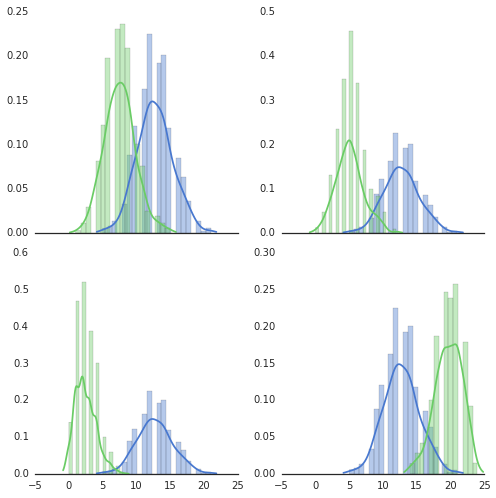

In [20]:
import numpy as np
import seaborn as sns

s1 = stats.binom(25, 0.5).rvs(500)
s2 = stats.binom(25, 0.3).rvs(500)
s3 = stats.binom(25, 0.2).rvs(500)
s4 = stats.binom(25, 0.1).rvs(500)
s5 = stats.binom(25, 0.8).rvs(500)

sns.set(style="white", palette="muted")
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

b, g, r, p = sns.color_palette("muted", 4)

sns.distplot(s1, color=b, ax=axes[0, 0])
sns.distplot(s2, color=g, ax=axes[0, 0])

sns.distplot(s1, color=b, ax=axes[0, 1])
sns.distplot(s3, color=g, ax=axes[0, 1])

sns.distplot(s1, color=b, ax=axes[1, 0])
sns.distplot(s4, color=g, ax=axes[1, 0])

sns.distplot(s1, color=b, ax=axes[1, 1])
sns.distplot(s5, color=g, ax=axes[1, 1])

plt.setp(axes)
plt.tight_layout()

### Hypothesis Testing

In [16]:
rv.cdf(16)

0.94612392783164978

In [21]:
def ppf_max(pp):
    """
    ppf(q) = max{x : cdf(x) <= q, x integer}
    ??? 95.0043
    """
    if rv.cdf(rv.ppf(pp)) > pp: return rv.ppf(pp) -1
    else: return rv.ppf(pp)

ppf_max(0.95)

16.0